# Enron Email Analysis 
_____

**Dedication**

I dedicate this analysis to myself "March 2016" self. After Graduating from [UC Davis](https://www.ucdavis.edu/), I spent my summer working at a cafe, meanwhile cold-applying to several data analyst jobs. However, I never got any responses... 

From there, I knew I had to prove I am a proficient data analyst.

I have proved what I am from my past projects, and continue to advance my technical portfolio to cement this claim.


** "Difficult takes a day, impossible takes a week"**

**\- Jay Z**

___

![Enron Image](../../Images/Enron.jpg)

[Enron: Fall of the Wall Street Darling: Gregory Smith](http://www.investopedia.com/updates/enron-scandal-summary/)

## Background and Motivation

### Background

Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. It was founded in 1985 as the result of a merger between Houston Natural Gas and InterNorth, both relatively small regional companies.

At Enron's peak, its shares were worth \$90.75, but after the company declared bankruptcy on December 2, 2001, they plummeted to \$0.67 by January 2002. 

To this day, many wonder how such a powerful business diminished in a short time span...

### Motivation

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. 

In the aftermath of this situation, Enron employee email conversations were then available to the general public. Particularly, Udacity's staff got their hands on it.

We implement advance statistical techniques (Machine Learning) to analyze these real-life Enron employee emails. Our goal is to determine any significant patterns in relation to the [2002 Enron situation](https://en.wikipedia.org/wiki/Enron_scandal).

___

## Data Import

### Import

In [1]:
import pickle #Serial/De-serializing Python objects
import sys
sys.path.append("../../Supplementary-Files")


import matplotlib.pyplot as plt
import numpy as np

import scipy
import pprint

import math

from sklearn.metrics import classification_report


from sklearn import svm
import time
from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from feature_format import targetFeatureSplit
from sklearn import cross_validation

from sklearn.cross_validation import StratifiedShuffleSplit

C:\Anaconda3\envs\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from feature_format import featureFormat

In [3]:
data_dict = pickle.load(open("../../Supplementary-Files/final_project_dataset.pkl","r"))

### Characteristics

#### Number of Features

In [4]:
features = list(data_dict.values()[1].keys())
feature_count = len(features)
print "The first 4 features:\n \n",features[0:4], "\n \n out of {} features".format(feature_count) 

The first 4 features:
 
['salary', 'to_messages', 'deferral_payments', 'total_payments'] 
 
 out of 21 features


We observe the first four features in our enron dataset.

Considering all 21 features, they can be categorized into three categories:

1. **Financial Features (units in US Dollars):**
    
    a. salary
    
    b. deferral_payments
    
    c. total_payments
    
    d. loan_advances
    
    e. bonus
    
    f. restricted_stock_deferred
    
    g. deferred_income
    
    h. total_stock_value
    
    i. expenses
    
    j. exercised_stock_options
    
    k. other
    
    l. long_term_incentive
    
    m. restricted_stock
    
    n. director_fees
2. **Email Features:**
    a. to_messages
    
    b. email_address
    
    c. from_poi_to_this_person
    
    d. from_messages
    
    e. from_this_person_to_poi
    
    f. shared_receipt_with_poi
3. **POI label:**

    a. poi (person of interest)

_(Data Dictionary can be found in the seperate "Enron Person of Interest Report" document )_

#### Number of Entries

In [5]:
#Count the # of keys/entries in a dictionary (rows of dataset)
def dict_nrows(dictionary_dataset):
    nrows = len(list(dictionary_dataset.keys()))
    return nrows

In [6]:
number_of_entries =dict_nrows(data_dict)
print(number_of_entries)

146


We have a total of 146 data points in our data dictionary.

#### Count of Non-Person of Interest(POI) and POI

We want to identify the count of non-POI and POI. Since we are testing/identifying POI Enron employees, we need to gauge our label test size.

In [7]:
#Non POI and POI Counter
def poi_counter(data_dictionary):
    poi_count_dict ={'Total_non-POI':0, 'Total_POI':0}
    
    for key, value in data_dictionary.iteritems():
        for inner_key, inner_val in value.iteritems():
            if inner_key=="poi" and inner_val==True:
                poi_count_dict['Total_POI'] +=1
            elif inner_key=="poi" and inner_val==False:
                poi_count_dict['Total_non-POI'] +=1
            else:
                pass
                                
    return(poi_count_dict)    

In [8]:
poi_count_dict = poi_counter(data_dict)

In [9]:
poi_count_dict

{'Total_POI': 18, 'Total_non-POI': 128}

Of the 146 entries, 18 people are "Person of Interest." I.e. $\text{# of Person of Interest(POI)} = \dfrac{18}{146}$

> As a quick clarification to the reader, **Person of Interest** is defined as fraudulent Enron Employees from the 2002 Enron crisis

## Feature Selection: A discussion

    
The goal of our analysis is to discover unpleasant findings with respect to Enron's 2002 crisis. 

We can observe the email features/conversations to discover absurd findings. However, let's take a simplier approach; can we discern crucial correlations from just two pieces of financial infromation? We first consider two financial features; we consider "salary" and "bonus" variables from the enron dataset.

These two evaluated variables allow us to potentially conclude our project early on to determine obscure findings.

### Obtain Sample Matrix

Using our provided featureFormat import, we create an n x 2 matrix between with salary and bonus features, respectively.

Thereafter, we verify the first five rows of the matrix

In [10]:
features_selected = ["salary", "bonus"]

In [11]:
enron_ds_salBon = featureFormat(data_dict,features_selected )

In [12]:
print(enron_ds_salBon[0:5])

[[  365788.   600000.]
 [  267102.  1200000.]
 [  170941.   350000.]
 [  243293.  1500000.]
 [  267093.   325000.]]


The first column is salary values, and the latter is bonus values.

### Parsing Matrix and Visualization

We parse the matrix into two arrays for a Salary vs Raise Scatterplot.

In [13]:
enron_ds_sal = enron_ds_salBon[:,0]
enron_ds_raise = enron_ds_salBon[:,1]

#### Salary vs Raise Visualization

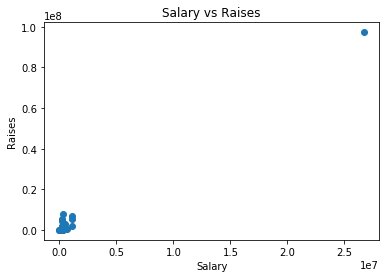

In [14]:
plt.scatter(enron_ds_sal,enron_ds_raise)

plt.xlabel("Salary")
plt.ylabel("Raises")
plt.title("Salary vs Raises")
plt.savefig("../../Output-Files/Report_Images/SalaryvRaises_0.jpg")
plt.show()

Odd. 

We observe some significant outlier at the point $(1.0 \text{x} 10^8,2.5\text{x} 10^7$) affecting our overall visualization.

We zoom in our graph by rescaling the x and y axis in the following graph

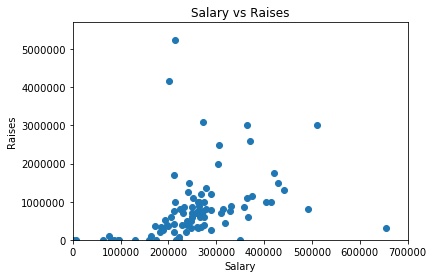

In [15]:
#Exclude Extreme Values in Visualization

enron_ds_sal_min = np.min(enron_ds_sal) #Minimum x axis value
enron_ds_sal_max = np.max(enron_ds_sal) #Maximum x axis value

enron_ds_raises_min = np.min(enron_ds_raise) #Minimum y axis value
enron_ds_raises_max = np.max(enron_ds_raise) #Maximum x axis value

#plot scatterplot
plt.scatter(enron_ds_sal,enron_ds_raise)

#labels
plt.xlabel("Salary")
plt.ylabel("Raises")
plt.title("Salary vs Raises")

#rescales axes
plt.ylim(enron_ds_sal_min, enron_ds_sal_max-21000000)
plt.xlim(enron_ds_raises_min,enron_ds_raises_min+700000)

#Display Scatterplot
plt.show()

Much better! 

Without somme significantly high values affecting our Salary vs Raises Scatterplot, we have now zoomed in the graph and observed some form of linearity between the two features. That is, as some salary $x$ goes up, we tend to observe larger raises.

#### Statistical Summary

The following lies statistical output for the Salary vs Raises consideration.

In [16]:
print "Described output for Salary vs Raises"
pprint.pprint(scipy.stats.describe(enron_ds_salBon) )
print 
print"Correlation Coefficient: ",scipy.stats.pearsonr(enron_ds_raise,enron_ds_sal)[0], "\n","P-Value",scipy.stats.pearsonr(enron_ds_raise,enron_ds_sal)[1]

Described output for Salary vs Raises
DescribeResult(nobs=95L, minmax=(array([ 477.,    0.]), array([ 26704229.,  97343619.])), mean=array([  562194.29473684,  2049339.34736842]), variance=array([  7.37866138e+12,   9.95751069e+13]), skewness=array([ 9.53125149,  9.31531747]), kurtosis=array([ 89.22989094,  86.42271551]))

Correlation Coefficient:  0.99321115087 
P-Value 1.06457686411e-88


We observe a large amount of correlation between two two features. However, we did not exclude the extreme outlier case from this brief analysis. 

As a forethought, we need to observe the occurance of this high value, and determine if we are required to remove it from our analysis.

#### Upper Outlier Investigation

After some investigation, we find:

1. Some of the abnormal data points occur from person's of interest (poi). I.e., We find some abnormally large points occuring from corrupt enron individuals.

2. Thought these corrupt individuals affect our analysis, they are not the cause for the absurd outlying case. There is one point we must consider in our extreme case...

In [17]:
def detect_upper_outliers(array):
    upper_out = []
    upper = (1.5)* np.percentile(array,75)
    for element in array:
        if element > upper:
            upper_out.append(element)
        else:
            pass
    return(upper_out)

The above is an outlier detection function for some given numerical positive value array. We categorized data points as upper outliers from the following definition:

> **Upper Outliers:** Data points <span style= "color:red">greater than</span> 1.5 $\cdot$ $q_3$, where $q_3$ is the value at 75% of some array/vector of values.

In [18]:
enron_ds_raise_outliers = detect_upper_outliers(enron_ds_raise)
enron_ds_raise_outliers

[2600000.0,
 3100000.0,
 2000000.0,
 1700000.0,
 8000000.0,
 3000000.0,
 3000000.0,
 7000000.0,
 5249999.0,
 1750000.0,
 5600000.0,
 97343619.0,
 4175000.0,
 2000000.0,
 2500000.0]

From the raise data in our sample enron dataset, we find several values as upper postive outliers. 

However, notice the significant difference between $\$97343619.0$ and the remaining values. 

The $\$97343619.0$ value is a factor of 10 time greater than that of the remaining values. Filtering out our dictionary values, we observe this value coming from the "Total" entry, seen below. 

Moreover, there seems to be two people named "Travel Agency in The Park" and "TOTAL"--odd.

Clearly these entries do not represent Enron Employees, but rather some summary or general information surrounding the Enron Employees. We take out these values.

In [19]:
data_dict['TOTAL']

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [20]:
data_dict['THE TRAVEL AGENCY IN THE PARK']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [21]:
enron_ds_sal_outliers = detect_upper_outliers(enron_ds_sal)
enron_ds_sal_outliers

[510364.0, 1072321.0, 1111258.0, 655037.0, 26704229.0, 492375.0, 1060932.0]

Detecting the Enron employee salary information, we found an estimated 8 outliers. Moreover, we can confirm "Total" affecting our analysis from the value $\$26704229.0$

### Undefined Value Extraction and Visualization

The following is outlier extraction from the extreme "Total" case and any additional slight-signficicant outliers for Scatterplot visalization.

The steps for this process are as followed:

1. Create undefined tracking dictionary for our data dictionary

2. Extract "Total" entry

3. From the tracked obscure entries/values, remove them

4. Create our defined values Salary versus Raise dataset

5. Salary versus Raise Scatterplot

####  Create Undefined tracking dictionary

In [22]:
undef_dict = {}
for key, value in data_dict.iteritems():
    for el in enron_ds_sal_outliers:
        if value['salary'] == el:
            undef_dict[key] = value
        elif value['salary'] =="NaN":
            undef_dict[key] = value
    
    for el in enron_ds_raise_outliers:
        if value["bonus"] == el:
            if key in undef_dict.keys():
                pass
            else:
                undef_dict[key] = value
        elif value['bonus'] =="NaN":
            if key in undef_dict.keys():
                pass
            else:
                undef_dict[key] = value
        else:
            pass

We have now created a dictionary tracking the undefined/bad data points that need to be extracted. Now, we take out the "TOTAL" and "The Traveler In The Park" entries that originally affected our Scatterplot.

In [23]:
undef_dict.keys()
undef_keys = list(undef_dict.keys())
print undef_keys[:10],"\n\nare the initial 10 people imposing a sigificant result in our analysis, from\n", len(undef_dict), "amount of outlying persons"

['HORTON STANLEY C', 'CORDES WILLIAM R', 'BHATNAGAR SANJAY', 'LEWIS RICHARD', 'HAYES ROBERT E', 'SAVAGE FRANK', 'HAYSLETT RODERICK J', 'URQUHART JOHN A', 'MCMAHON JEFFREY', 'REDMOND BRIAN L'] 

are the initial 10 people imposing a sigificant result in our analysis, from
81 amount of outlying persons


#### Remove "Total" entry

In [24]:
undef_dict.pop("TOTAL")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

#### Remove "TRAVEL AGENCY IN THE PARK" entry

In [25]:
undef_dict.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

#### Remove An Enron Employee entry

Observing some of the data through a table, we noticed an Enron Employee that was not recorded correctly. I.e., We see Eugene LockHart's information not available in the Enron Dataset. 

Because this employee's information was not properly tracked, we remove the entry.

In [26]:
undef_dict.pop('LOCKHART EUGENE E')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

#### Create Defined Dictionary

In [27]:
data_dict_no_undef = data_dict.copy()
for undef_element in undef_keys:
    if undef_element in data_dict_no_undef :
        del data_dict_no_undef[undef_element]

#### Defined Values Dataset

In [28]:
enron_ds_salBon_no_undef = featureFormat(data_dict_no_undef,features_selected )
enron_ds_sal_no_undef = enron_ds_salBon_no_undef[:,0]
enron_ds_raise_no_undef = enron_ds_salBon_no_undef[:,1]

#### Salary versus Raise (defined) Scatterplot

With the removal of the "TOTAL" and "THE TRAVEL AGENCY IN THE PARK" data points, re-visualize the Salary versus Raise Scatterplot below.

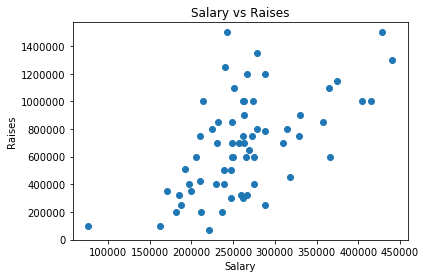

In [29]:
plt.scatter(enron_ds_sal_no_undef,enron_ds_raise_no_undef )

plt.xlabel("Salary")
plt.ylabel("Raises")
plt.title("Salary vs Raises")
plt.savefig("../../Output-Files/Report_Images/SalaryvRaises_1.jpg")
plt.show()

Along with this visualization, we provide some brief statistics on Salary vs. Raises

In [30]:
print "Described output for Salary vs Raises"
pprint.pprint(scipy.stats.describe(enron_ds_salBon_no_undef) )
print 
print"Correlation Coefficient: ",scipy.stats.pearsonr(enron_ds_raise,enron_ds_sal)[0], "\n","P-Value",scipy.stats.pearsonr(enron_ds_raise,enron_ds_sal)[1]

Described output for Salary vs Raises
DescribeResult(nobs=65L, minmax=(array([ 76399.,  70000.]), array([  440698.,  1500000.])), mean=array([ 263358.16923077,  685671.07692308]), variance=array([  4.27305011e+09,   1.25704380e+11]), skewness=array([ 0.56259694,  0.31932616]), kurtosis=array([ 1.16526257, -0.58418445]))

Correlation Coefficient:  0.99321115087 
P-Value 1.06457686411e-88


We observe a 99.3% correlation value with a very small chance of predicting Salary vs Raises by chance. I.e., we observe observe strong linearity between the two variables with a p value of $1.06x{10^{-88}}$.

However, these two variables to not answer our original equation. Yes, it's nice to go through this analysis. But, but, we do not answer the question "Is there some indication of fraud from Enron employees from the given information." 

No. We have only done two things, which are far away from our goal.

We have:
1. Observed the financial dependence of salary to that of raises. That is, we observe an expected proportion of a  bonus, for some given salary.

2. Found outlier cases within our analysis. 

Going forward, we need to apply some logistic regression to answer if there exists some occurance of fraud from the given data. Moreover, we need to be aware of bad and outlying data values that could propogate error in our analysis.

___

## Enron Information Evaluation

We determine the existence of fraud from Enron employees from the given information. It can be hard to indicate what features we need to answer our question. However, we utlize advance techniques to significantly decrease the time spend on evaluating what features to select.

Moreover, we investigate the accuracy of using advanced models to determine optimal features.

Lastly, we validate the final model utilized in predicting POI individuals from the 2002 Enron situation.

### Import

In [31]:
dataset = pickle.load(open("../../Supplementary-Files/final_project_dataset.pkl","r"))

### Data Munging

#### Removing Extreme "TOTAL" Outlier Case

In [32]:
dataset.pop("TOTAL")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [33]:
dataset.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [34]:
dataset.pop('LOCKHART EUGENE E')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

#### Badata ( Bad Data) Count

We observed the past "TOTAL" data point affecting our data, as an outlier. Moreover, we found less significant outliers. However, we did not inspect the quality of our enron information. That is, we verified outlier data points, but we need to check null, missing, or other poor entries.

In [35]:
def badata(data_dictionary):
    feature_badata_count_dict ={'salary':0, 'to_messages':0, 'deferral_payments':0 
                                , 'total_payments':0, 'exercised_stock_options':0, 'bonus':0 
                                , 'restricted_stock':0, 'shared_receipt_with_poi':0, 'restricted_stock_deferred':0 
                                , 'total_stock_value':0, 'expenses':0, 'loan_advances':0, 'from_messages':0, 'other':0,
                                'from_this_person_to_poi':0, 'poi':0, 'director_fees':0, 'deferred_income':0, 
                                'long_term_incentive':0, 'from_poi_to_this_person':0}
    for key, value in data_dictionary.iteritems():
        for inner_key, inner_val in value.iteritems():
            for ft_key, ft_val in feature_badata_count_dict.iteritems():
                if inner_key == ft_key and math.isnan(float(inner_val)):
                    feature_badata_count_dict[ft_key] +=1
                                
    return(feature_badata_count_dict)

In [36]:
bad_data_count = badata(dataset)

In [37]:
bad_data_count

{'bonus': 62,
 'deferral_payments': 105,
 'deferred_income': 95,
 'director_fees': 127,
 'exercised_stock_options': 42,
 'expenses': 49,
 'from_messages': 57,
 'from_poi_to_this_person': 57,
 'from_this_person_to_poi': 57,
 'loan_advances': 140,
 'long_term_incentive': 78,
 'other': 52,
 'poi': 0,
 'restricted_stock': 34,
 'restricted_stock_deferred': 126,
 'salary': 49,
 'shared_receipt_with_poi': 57,
 'to_messages': 57,
 'total_payments': 20,
 'total_stock_value': 18}

The above information is the count of "NaN" values in our dataset. We observe that "Loan Advances" has the highest count(142) of "NaN" values.

#### Imputation

We can choose to elminate data points for our analysis. However, we choose not to risk the action of losing data. Recall there are 146 data points. If we remove at most 142, we can analze ony 4 data points--<span style = "color:red">absurd.</span>

We decide to fill in the "NaN" values with "0.0" value instead. I.e. We impute the missing data with the integer $0$

In [38]:
def imputeValues(dataframe_dict):
    numerical_types_list = ['bonus','deferral_payments','deferred_income','director_fees','exercised_stock_options','expenses','loan_advances','long_term_incentive','other','restricted_stock','restricted_stock_deferred',
                    'salary','total_payments','total_stock_value','from_this_person_to_poi']
    text_types_list = ['from_messages','from_poi_to_this_person','from this person_to_poi','shared_receipt_with_poi','to_messages']
    for key, values in dataframe_dict.iteritems():
        for inner_key, inner_value in values.iteritems():
            if inner_key in numerical_types_list or inner_key in text_types_list:
                if math.isnan(float(inner_value)):
                    dataframe_dict[key][inner_key] = 0
                    #print( dataframe_dict[key][inner_key])
            elif inner_key in text_types_list:
                if math.isnan(float(inner_value)):
                    if inner_key is 'poi':
                        if inner_value is 'True':
                            dataframe_dict[key][inner_key] = 0
                        else:
                            dataframe_dict[key][inner_key] = 0
                    else:
                        dataframe_dict[key][inner_key] = 0
            else:
                pass
    return(dataframe_dict)
                    

In [39]:
dataset_cleaned = imputeValues(dataset)

In [40]:
bad_data_count = badata(dataset_cleaned)

In [41]:
bad_data_count

{'bonus': 0,
 'deferral_payments': 0,
 'deferred_income': 0,
 'director_fees': 0,
 'exercised_stock_options': 0,
 'expenses': 0,
 'from_messages': 0,
 'from_poi_to_this_person': 0,
 'from_this_person_to_poi': 0,
 'loan_advances': 0,
 'long_term_incentive': 0,
 'other': 0,
 'poi': 0,
 'restricted_stock': 0,
 'restricted_stock_deferred': 0,
 'salary': 0,
 'shared_receipt_with_poi': 0,
 'to_messages': 0,
 'total_payments': 0,
 'total_stock_value': 0}

After cleaning the data, we signficantly imputed the "NaN" values with $0.0$

#### Added Features

Recall the **Feature Selection: A Discussion** section. We observed the bivariate analysis of Salary versus Bonus was only not sufficient in predicting fraudulent, POI, Enron employees, we saw the features were not explicitily catored to answering our question.

We will implement four new features to potentially indentify Eron POI. 

The **first two** additions are the ratio between an employee and the CEO, _Jeffrey K. Skilling_.

The implementation for these four new features can lead to the following:

- If the ratio in bonus between an employee and the CEO is significantly closer to the value 1, then we can suspect some type of corruption occuring.

- If the ratio in salary between an employee and the CEO is significantly closer to the value 1, then we can suspect some type of corruption occuring.

These features are linear transformations of the salary and bonus information presented. We factor how close ones's financial information is with respect to the CEO to determine POI relationship.

The **remaining two** additional features are the inbound and outbound email ratios between a POI.


The implementation for these four new features can lead to the following:

- If the ratio $\dfrac{\text{Received emails from POI}}{\text{All received Emails}}$ is closer to the value 1, we can suspect an individual is a POI.

- If the ratio $\dfrac{\text{Sent emails from POI}}{\text{All Sent Emails}}$ is closer to the value 1, we can suspect an individual is a POI.


[Absolute vs Relative Difference](https://marketingexperiments.com/digital-analytics/absolute-versus-relative-difference)

##### CEO Information

In [42]:
for k, v in dataset_cleaned.iteritems():
    if k == 'SKILLING JEFFREY K':
        print k,v

SKILLING JEFFREY K {'salary': 1111258, 'to_messages': 3627, 'deferral_payments': 0, 'total_payments': 8682716, 'exercised_stock_options': 19250000, 'bonus': 5600000, 'restricted_stock': 6843672, 'shared_receipt_with_poi': 2042, 'restricted_stock_deferred': 0, 'total_stock_value': 26093672, 'expenses': 29336, 'loan_advances': 0, 'from_messages': 108, 'other': 22122, 'from_this_person_to_poi': 30, 'poi': True, 'director_fees': 0, 'deferred_income': 0, 'long_term_incentive': 1920000, 'email_address': 'jeff.skilling@enron.com', 'from_poi_to_this_person': 88}


In [43]:
ceo_info = {'SKILLING JEFFREY K':{'salary':dataset_cleaned['SKILLING JEFFREY K']['salary'],'bonus':dataset_cleaned['SKILLING JEFFREY K']['bonus']}}

In [44]:
ceo_info

{'SKILLING JEFFREY K': {'bonus': 5600000, 'salary': 1111258}}

###### Added Features

The following code identifies the CEO salary and bonus information, and thereafter adds four new features for every Enron employee.



In [45]:
def financial_ratio(data, financial_information):
    ratio_info = {}
    employee_list = []
    data_length = len(data)
    ceoSalary = ceo_info['SKILLING JEFFREY K'][financial_information] 
    

    for key, value in data.iteritems():
        employee_list.append(key)

    for i in employee_list:

        for key, values in data.iteritems():
            
            for inner_key, inner_value in values.iteritems():                
                if inner_key == financial_information:
                    ratio_value = round((float(inner_value)/ceoSalary),4)
                    ratio_info[key] = {"ceo_to_employee_{}_ratio".format(financial_information): ratio_value}

    ratio_info[key] = {"ceo_to_employee_{}_ratio".format(financial_information): ratio_value}
                    

    for key, value in data.iteritems():
        value[ratio_info[key].keys()[0]] = ratio_info[key]["ceo_to_employee_{}_ratio".format(financial_information)]

    return(data)

#[](https://stackoverflow.com/questions/2958684/python-division)

In [46]:
def email_proportion(data, Sent_or_Received_email_interaction):
    assert Sent_or_Received_email_interaction in ["Sent","Received"]
    proportion_info = {}
    ratio_info = {}
    employee_list = []
    data_length = len(data)  
    
    if Sent_or_Received_email_interaction == "Sent":
        #Get a reference list of employees and values
        for key, value in data.iteritems():
            employee_list.append(key)

        for i in employee_list:
            #Names and values
            for key, values in data.iteritems():

                ratio_value = 0
                if values["to_messages"]==0:
                    ratio_value = 0
                else:
                    ratio_value = round((float(values["from_this_person_to_poi"])/values["to_messages"]),4)
                    
                ratio_info[key] = {"ratio_of_sent_messages_to_poi": ratio_value}
        ratio_info[key] = {"ratio_of_sent_messages_to_poi": ratio_value}


        for key, value in data.iteritems():
            value[ratio_info[key].keys()[0]] = ratio_info[key]["ratio_of_sent_messages_to_poi"]
            
    elif Sent_or_Received_email_interaction == "Received":
        #Get a reference list of employees and values
        for key, value in data.iteritems():
            employee_list.append(key)

        for i in employee_list:
            #Names and values
            for key, values in data.iteritems():

                ratio_value = 0
                if values["from_messages"]==0:
                    ratio_value = 0
                else:
                    ratio_value = round((float(values["from_poi_to_this_person"])/values["from_messages"]),4)
                ratio_info[key] = {"ratio_of_received_messages_to_poi": ratio_value}
        ratio_info[key] = {"ratio_of_received_messages_to_poi": ratio_value}


        for key, value in data.iteritems():
            value[ratio_info[key].keys()[0]] = ratio_info[key]["ratio_of_received_messages_to_poi"]

    return(data)


In [47]:
dataset_v2 = financial_ratio(dataset_cleaned,'salary')

We add the "ceo_to_employee_salary_difference" feature to our data dictionary, the salary difference between an employee and the CEO

In [48]:
dataset_v3 = financial_ratio(dataset_v2,'bonus')

We add the "ceo_to_employee_bonus_difference" feature to our data dictionary, the bonus difference between an employee and the CEO

In [49]:
dataset_final_v4 = email_proportion(dataset_v3,'Received')

We add the "ratio_of_sent_messages_to_poi" feature to our data dictionary, the proportion of messages received from a POI employee to that of all received messages

In [50]:
dataset_final_version = email_proportion(dataset_final_v4,'Sent')

We add the "ratio_of_sent_messages_to_poi" feature to our data dictionary, the proportion of messages sent to a POI employee to that of all sent out messages

**The following is a confirmation** that we added these four new features to entry 24 of our email dataset

Ratio of Received Messages to POI

In [51]:
dataset_final_version.values()[25]['ratio_of_received_messages_to_poi']

0.0351

Ratio of Sent Messages to POI

In [52]:
dataset_final_version.values()[25]['ratio_of_sent_messages_to_poi']

0.0258

CEO to Employee Bonus Ratio

In [53]:
dataset_final_version.values()[25]['ceo_to_employee_bonus_ratio']

0.3571

CEO to Employee Salary Ratio

In [54]:
dataset_final_version.values()[25][ 'ceo_to_employee_salary_ratio']

0.2737


___

### Analysis 

![http://blog.presentationload.com/optimize-profit-margin-using-value-chain-analysis/](../../Images/analysis.jpg)



We select several numerical features. Moreoever, we factor in the four engineered features discussed in the previous section.

We then implement a few algorithms to decide on what top three to four features we should implement for predicting people of interest in the Enron email scandal.

I.e. we zoom out to consider the following features, then zoom in to precise feature selections to predict Enron fraudsters.

1. POI

2. CEO to Employee Bonus Ratio

3. Total Payments

4. Exercised Stock Options

5. CEO to Employee Salary Ratio

6. Restricted Stock

7. Shared Receipt with POI

8. FROM POI to This Person

9. From Messages

10. From this Person to POI

11. Ratio of Sent Messages to POI

12. Ratio of Received Messages to POI

13. Deferral Payments

14. Loan Advances

15. Restricted Stock Deferred
                 
16. Deferred Income

17. Expenses

18. Other

19. Long Term Incentive

20. Director Fees

> <a style = "color:red">Note:</a> **We do not** implement Salary and Bonus into our feature selection process due to the multicollinearity association to CEO to Employee Salary Ratio and CEO to Employee Bonus Ratio, respectively. Moreover, "From Poi to this Person," "From Messages", and "From this Person to Poi" are collinear with ratio of interactions with POI

> **Cutoff Criteria:** We select the top features of each algorithm implementation with a cutoff score being a a 5 digit difference between two sequential features (e.g. Total expenses being .10 and the next being 0.05) [SelectK best case: 5.0+ digit difference.]. 

> Thereafter, we consider selecting the appropriate features for our final portion of our analysis from the score difference between the first and fifth ranked feature.



#### Import Clean Enron Data

We import the cleaned Enron dataset, and proceed with a full evaluation.

In [55]:
#Selected features
features_ds_2 = ['poi', 'ceo_to_employee_bonus_ratio', 'total_payments','exercised_stock_options',
                 'ceo_to_employee_salary_ratio','restricted_stock', 'shared_receipt_with_poi',
                 'ratio_of_sent_messages_to_poi','ratio_of_received_messages_to_poi',
                 'deferral_payments','loan_advances','restricted_stock_deferred','total_stock_value',
                 'deferred_income','expenses','other','long_term_incentive','director_fees']
#Format feature information for data purity 
enron_ds2 = featureFormat(dataset_final_version,features_ds_2)

In [56]:
enron_ds2[:2]

array([[  0.00000000e+00,   1.07100000e-01,   1.06182700e+06,
          0.00000000e+00,   3.29200000e-01,   5.85062000e+05,
          7.02000000e+02,   1.20000000e-03,   1.31030000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.85062000e+05,   0.00000000e+00,   9.42990000e+04,
          1.74000000e+03,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   2.14300000e-01,   5.63434300e+06,
          6.68054400e+06,   2.40400000e-01,   3.94271400e+06,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.29573800e+06,   0.00000000e+00,   0.00000000e+00,
          1.06232580e+07,  -1.38605500e+06,   1.12000000e+04,
          2.66030300e+06,   1.58605500e+06,   0.00000000e+00]])

#### Feature Selection

We implement two algorithms for our feature selection process. Thereafter, we implement one more algorithm for both feature selection, and observing validity of its model architecture in the following section. 

From the feature ranking results of these implementations, we narrow down three to four features from a wide selection of features for model training and validation.

In [58]:
#Split data
labels, features = targetFeatureSplit(enron_ds2)

We let partition the labels and features dataset by 30%, for testing purposes. 

We utilize the remaining 70% to train our model.

In [59]:
#Randomly select observations with the Stratified Shuffle split algorithm
sss = cross_validation.StratifiedShuffleSplit(labels, n_iter=1000,test_size = 0.30, random_state=11)

# Partition data for evaluation
for i_train, i_test in sss:
    features_train, features_test = [features[i] for i in i_train], [features[i] for i in i_test]
    labels_train, labels_test = [labels[i] for i in i_train], [labels[i] for i in i_test]


##### Importance of Top Features with SelectKBest

We implement the [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) method for selecting features according to the **k** highest scores. These k factors will be one of our few considerations for feature selection.

The following scenario is k='all' pre-selected cases. 

> Added: Per correction/comment, 'k' looks at the features after score computation and keeps the top features for next fitting process.

In [60]:
#Start timer
t0 = time.time()

#Fitting training data with SelectKBest classifier
select = SelectKBest( k='all').fit(features_train,labels_train)

In [61]:
#Ranking scores
scores = select.scores_

#Create a dictionary of independent variables with their respective scores
feature_scores_dict = {}
for i in range(len(features_ds_2)-1):
    feature_scores_dict[features_ds_2[i+1]] = scores[i]
feature_scored_dict_sorted = sorted(feature_scores_dict.items(), key=lambda x:x[1])

print round(time.time()-t0,3),"seconds"

print
pprint.pprint(feature_scored_dict_sorted)


0.111 seconds

[('restricted_stock_deferred', 0.68269553830311047),
 ('deferral_payments', 0.72540432049800641),
 ('director_fees', 1.2708940111154361),
 ('deferred_income', 2.3749825314864901),
 ('ratio_of_received_messages_to_poi', 2.7834819846115084),
 ('expenses', 3.1171958812121265),
 ('restricted_stock', 3.8709241235414278),
 ('other', 4.5178575832625096),
 ('shared_receipt_with_poi', 5.6563092789776404),
 ('long_term_incentive', 6.7193277318638334),
 ('loan_advances', 7.0379327981934612),
 ('ratio_of_sent_messages_to_poi', 7.451462176652365),
 ('total_payments', 7.7796020342870165),
 ('ceo_to_employee_bonus_ratio', 8.7944390673562474),
 ('ceo_to_employee_salary_ratio', 9.5650197789125269),
 ('total_stock_value', 10.517318476121625),
 ('exercised_stock_options', 10.765336743969712)]


For ranking the importance of all recommended features, The most useful features are:

1. Exercised Stock Options

2. Total Stock Value

3. CEO To Employee Salary Ratio

4. CEO To Employee Bonus Ratio

5. Total Payments

6. Ratio of Sent Messages to POI

7. Loan Advances

Therafter, we observe our cutoff of a five point difference at feature rank #7, from the top feature.

Our findings within the SelectKBest implementation had Exercised Stock Options as our top feature recommendation.

Moreover, we observe that CEO to Employee Bonus Ratio and CEO to Employee Salary Ratio ranked within top 5 features for our model selection, as seen below:

1. Exercised Stock Options

2. Total Stock Value

3. CEO To Employee Salary Ratio

4. CEO To Employee Bonus Ratio

5. Total Payments

At the core of our questions, these engineered variables from email interactions do indeed answer the question of finding peolpe of interest from interaction of POI.

Though we had a performance of 0.214 seconds, the SKBest method is one of the few univariate feature selection proccesses within SKlearn. SelectKBest goes by selecting the best features based on univariate statistical tests, scores based off ANOVA. 


The following is an attempt at Extra Trees Implementation for attaining the top k recommended features.

##### Importance of Top Features with Extra Trees Classifier

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
clf_fit = clf.fit(features_train, labels_train)
important_feat = list(clf_fit.feature_importances_)
clf.feature_importances_  


array([ 0.08694814,  0.09484693,  0.11895763,  0.033723  ,  0.03184003,
        0.0999298 ,  0.0891588 ,  0.072334  ,  0.03870121,  0.01853307,
        0.        ,  0.0510468 ,  0.03540347,  0.06544414,  0.0894602 ,
        0.07235274,  0.00132007])

In [63]:
feature_importance_dict = {}
for i in range(0,len(features_ds_2)-1):
    feature_importance_dict[features_ds_2[i+1]] = important_feat[i]
    
feature_importance_dict_sorted = sorted(feature_importance_dict.items(), key=lambda x:x[1])

pprint.pprint(feature_importance_dict_sorted)


[('restricted_stock_deferred', 0.0),
 ('director_fees', 0.0013200655683690543),
 ('loan_advances', 0.018533066327773649),
 ('restricted_stock', 0.031840030161243316),
 ('ceo_to_employee_salary_ratio', 0.033722996441821522),
 ('deferred_income', 0.03540346604742195),
 ('deferral_payments', 0.038701206617248601),
 ('total_stock_value', 0.051046798849218013),
 ('expenses', 0.06544413687815033),
 ('ratio_of_received_messages_to_poi', 0.072333998120020532),
 ('long_term_incentive', 0.072352738396785021),
 ('ceo_to_employee_bonus_ratio', 0.086948143713929296),
 ('ratio_of_sent_messages_to_poi', 0.089158796747942914),
 ('other', 0.089460196075168488),
 ('total_payments', 0.094846934597694457),
 ('shared_receipt_with_poi', 0.099929795859655932),
 ('exercised_stock_options', 0.11895762959755693)]


For ranking the importance of all recommended features, The most useful features are:

1. Exercised Stock Options

2. Shared Receipt with POI

3. Total Payments

4. Other

5. Ratio of Sent Messages to POI

6. CEO to Employee Bonus Ratio

7. Long Term Incentive

8. and more

Thereafter, we proceed to follow our cutoff score of a ranking difference of an estimated 0.05 after feature rank #8.

Our findings within the Extra Trees implementation had Exercised Stock Options  as our top feature recommendation.

Moreover, we observe that CEO to Employee Bonus Ratio and CEO ranked within top 10 features for our model selection.

At the core of our questions, these engineered variables from email interactions do indeed answer the question of finding peopel of interest from interaction of POI.

The Extra Trees classifier is a variant of the popular Random Forest algorithm. However, each step of the Extra Trees implementation has random decision boundaries selected, rather than the best one. Moreover, Extra Trees classifier is great for our numerical features!


With the implementation of SelectKBest and Extra Trees Classifer, we carry on with two additional algorithms. These algorithms will not only provide a recommended list of features for determining POI, but we evaluate the models performance.

### Continued Feature Selection w/Model Performance Calibration

We continue our feature selection conversations. However, we verify model accuracy, precision, and recall scores for another algorithm--Decision Tree Algorithm

____

<a style ="color:red">Interlude</a> 

<u>Quick Definitions</u>

**Model Accuracy **

When TP < FP, then accuracy will always increase when we change a classification rule to always output “negative” category. Conversely, when TN < FN, the same will happen when we change our rule to always output “positive
> Note: This following section also provides the Precision, Recall, and F1-Score related to our implemented models. 

>In our case, 

>**Precision** (TP)/(TP+FP) cares about whether the positive examples predicted by our model were correct. In our case, what's the % Enron employees classified as POI correctly out of all classified Enron Employees classified as POI.

>**Recall** (TP)/(TP+FN) cares more on whether we have predicted all positive examples in the data. In our case, what is the percent of predictions were correctly identified POI, for all actual POI.


>where TP:=True Postive, FN:=False Negative, FP:= False Postives, TN:= True Negatives, as seen below



| True State/Diagnosis | NOT POI | POI |
|---------------------:|---------|-----|
|              NOT POI | TN      | FP  |
|                  POI | FN      | TP  |


<a style ="color:red">End of Interlude</a>
___


##### Decision Tree Algorithm

We utilize the Decision Tree algorithm using the "enron_ds2" (clean dataset) to evaluate POI forecasting for some given $k$ features.

In [64]:
#Decision Tree implementation with default parameters
clf_dt = DecisionTreeClassifier()
clf_dt.fit(features_train,labels_train)

#Score of classifier and predict labels for testing
score = clf_dt.score(features_test,labels_test)
pred= clf_dt.predict(features_test)

#Start timer
t0 = time.time()


print'Score:', score

#Get important values and make a sorted list
importance = clf_dt.feature_importances_
feature_importances_dict = {}
for i in range(len(features_ds_2)-1):
    feature_importances_dict[features_ds_2[i+1]] = importance[i]
feature_importances_dict_sorted = sorted(feature_importances_dict.items(), key=lambda x:x[1])

print "Algorithm Performance in ",round(time.time()-t0,3),"seconds"

print 
print "Rankings Importance:"
print

pprint.pprint(feature_importances_dict_sorted) 
print 


#Print Report
targ_names =['Not a POI','POI']
classif_report_dt = classification_report(labels_test,pred,target_names=targ_names)
print "Classification Report\n",classif_report_dt

Score: 0.744186046512
Algorithm Performance in  0.001 seconds

Rankings Importance:

[('loan_advances', 0.0),
 ('restricted_stock_deferred', 0.0),
 ('deferral_payments', 0.0),
 ('ratio_of_received_messages_to_poi', 0.0),
 ('shared_receipt_with_poi', 0.0),
 ('exercised_stock_options', 0.0),
 ('other', 0.0),
 ('director_fees', 0.0),
 ('long_term_incentive', 0.0),
 ('deferred_income', 0.058944886531093435),
 ('ceo_to_employee_salary_ratio', 0.066982825603515275),
 ('restricted_stock', 0.073681108163866804),
 ('total_payments', 0.076573683229657658),
 ('ratio_of_sent_messages_to_poi', 0.10125570470398072),
 ('expenses', 0.10525872594838113),
 ('total_stock_value', 0.14384655799914459),
 ('ceo_to_employee_bonus_ratio', 0.37345650782036049)]

Classification Report
             precision    recall  f1-score   support

  Not a POI       0.91      0.79      0.85        38
        POI       0.20      0.40      0.27         5

avg / total       0.83      0.74      0.78        43



For ranking the importance of all recommended features, The top important features are:

1. Total Stock Value

2. CEO to Employee Bonus Ratio

3. Expenses

Our top features only have one commmon feature in common from the results of our other features. This feature is CEO to Employee Bonus Ratio.

Moreover, this scenario has a precision of 0.20 and recall of 0.40 for determining POI. This is partially good to see, however we should observe that this, and the past outcomes, is not optimal for model implementation. I.e.,Notice that we implemented the Decision Tree algorithm with default parameters, and previous algorithms as well. This consideration occurs because we do not know if our feature selection process was optimal in selection. 


We implement this procedure through **hypertuning**, alongside **cross validation**.

**Comments**

In the "Model Metrics and Ranking" source, we observe the folowing:


>"Calibration dramatically improves the performance
of boosted trees, SVMs, boosted stumps, and
Naive Bayes, and provides a small, but noticeable improvement
for random forests. Neural nets, bagged
trees, memory based methods, and logistic regression
are not significantly improved by calibration.
With excellent performance on all eight metrics, calibrated
boosted trees were the best learning algorithm
overall. 

>Random forests are close second, followed by
uncalibrated bagged trees, calibrated SVMs, and uncalibrated
neural nets. The models that performed
poorest were naive bayes, logistic regression, decision
trees, and boosted stumps. Although some methods
clearly perform better or worse than other methods
on average, there is significant variability across the
problems and metrics. Even the best models sometimes
perform poorly, and models with poor average."



#### Model Accuracies with Hypertuning

Hyperparameter optimizing is the problem of choosing a set of optimal hyperparameters for a learning algorithm. We ensure the model does not, for example, overfit its data by (over)tuning. Moreover, the opportunity of better model performance is more likely.

We implement cross validation and testing from optimally identifying model parameters within the Gaussian Naive Baye's and Decision Tree implementation.

To split/sparse data, we implement Stratified Shuffle Split method to obtain train/test split data. We fine tune the sampling size of our training data, and find some outcome of accuracy from the said change.

###### Selected Features from Feature Selection Process and Data Partioning 

The top re-occuring features to select from where, in frequency:

1. CEO To Employee Bonus Ratio

2. CEO To Employee Salary Ratio

3. Ratio of Sent Messages to POI

4. Exercised Stock Options

in which CEO To Employee Bonus Ratio, Ratio of Sent Messages to POI, and CEO To Employee Salary Ratio were a part of our engineered features.

We selected  Exercised Stock Options, CEO To Employee Bonus Ratio, Ratio of Sent Messages to POI, and CEO To Employee Salary Ratio as our features to implement in this hypertuning process. 

In [65]:
### features_list is a list of strings

features_list = ['poi','ratio_of_received_messages_to_poi', 'ceo_to_employee_bonus_ratio','ratio_of_sent_messages_to_poi'
                 ,'ceo_to_employee_salary_ratio','exercised_stock_options']


### store to my_dataset for easy export below
ceo_difference_dataset = dataset_final_version


data = featureFormat(ceo_difference_dataset, features_list)


### split into labels and features 
labels, features = targetFeatureSplit(data)

### deploying data partioning
#from sklearn import cross_validation
#features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.30, random_state=42, stratify = labels)


##### Stratified Shuffle Split Implementation

In [66]:
#SSS implemenation for partitioning training and testing data
sss = cross_validation.StratifiedShuffleSplit(labels, n_iter=1000,test_size = 0.30, random_state=11)


for i_train, i_test in sss:
    features_train, features_test = [features[i] for i in i_train], [features[i] for i in i_test]
    labels_train, labels_test = [labels[i] for i in i_train], [labels[i] for i in i_test]

##### Naive Bayes Algorithm with Manual Tuning Cases

Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. More information can be found in my [Machine Learning Basics Documenation](https://github.com/CloudChaoszero/General-Statistics-and-ML-Concepts/blob/master/ML/Machine_Learning_Notes.ipynb).

The following are several manual tuning cases for the Naive Bayes implementation. In each scenario, we modify the following classifier's parameter:

1. Prior
    
    > Note: Priors are the probabilities of the classes. If specified the priors are not adjusted according to the data.

In [67]:
from sklearn.naive_bayes import GaussianNB

def GNB_hypertuning(priors):
    #Modified Parameters
    
    #Start Timer
    t0 = time.time()
    clf = GaussianNB(priors)
    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    print("Manual Tuning Decision tree algorithm time in %0.3fs" % (time.time() - t0))

    acc= metrics.accuracy_score(labels_test, pred)
    print "Tuning Accuracy: ", acc

    # function for calculation ratio of true positives
    # out of all positives (true + false)
    print 'Manual Tuning Precision: ', metrics.precision_score(labels_test,pred)

    # function for calculation ratio of true positives
    # out of true positives and false negatives
    print 'Manual Tuning Recall: ', metrics.recall_score(labels_test,pred)
    print(classification_report( labels_test,pred))


###### Gaussian Naive Bayes Manual Tuning with Default Settings

In [68]:
GNB_1 = GNB_hypertuning(priors = None)

Manual Tuning Decision tree algorithm time in 0.005s
Tuning Accuracy:  0.846153846154
Manual Tuning Precision:  0.333333333333
Manual Tuning Recall:  0.2
             precision    recall  f1-score   support

        0.0       0.89      0.94      0.91        34
        1.0       0.33      0.20      0.25         5

avg / total       0.82      0.85      0.83        39



###### Gaussian Naive Bayes Manual Tuning with Prior Probability Not POI at 90%

In [69]:
GNB_2 = GNB_hypertuning(priors = [.1,.9])

Manual Tuning Decision tree algorithm time in 0.002s
Tuning Accuracy:  0.128205128205
Manual Tuning Precision:  0.128205128205
Manual Tuning Recall:  1.0
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        34
        1.0       0.13      1.00      0.23         5

avg / total       0.02      0.13      0.03        39



C:\Anaconda3\envs\python27\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###### Gaussian Naive Bayes Manual Tuning with Prior Probability Not POI at 60%

In [70]:
GNB_3 = GNB_hypertuning(priors = [.4,.6])

Manual Tuning Decision tree algorithm time in 0.001s
Tuning Accuracy:  0.794871794872
Manual Tuning Precision:  0.2
Manual Tuning Recall:  0.2
             precision    recall  f1-score   support

        0.0       0.88      0.88      0.88        34
        1.0       0.20      0.20      0.20         5

avg / total       0.79      0.79      0.79        39



###### Gaussian Naive Bayes Manual Tuning with Prior Probability Not POI at 10%

In [71]:
GNB_4 = GNB_hypertuning(priors = [.9,.1])

Manual Tuning Decision tree algorithm time in 0.001s
Tuning Accuracy:  0.846153846154
Manual Tuning Precision:  0.333333333333
Manual Tuning Recall:  0.2
             precision    recall  f1-score   support

        0.0       0.89      0.94      0.91        34
        1.0       0.33      0.20      0.25         5

avg / total       0.82      0.85      0.83        39



| Metrics |  Gaussian Naive Bayes Algorithm Time before Tuning(seconds)  |Accuracy before Tuning|Precision Before Tuning|Recall before Tuning|F1-Score before Tuning|Gaussian Naive Bayes Algorithm Time after Tuning (seconds) |Accuracy after Tuning|Precision after Tuning|Recall after Tuning|F1-Score after Tuning|
|--------|--------|--------|--------|--------|--------|--------|--------|------|------|----|
|  Default Settings | 0.005| 0.846| 0.33| 0.20| 0.25| **0.005**| **0.846**| **0.33**| **0.20**| **0.25**|
|Non-POI 90% | 0.005| 0.846| 0.33| 0.20| 0.25| **0.002**| **0.128**|**0.13**| **1.00**| **0.23**|
|Non-POI 60%| 0.005| 0.846| 0.33| 0.20| 0.25| **0.001**| **0.795**| **0.20**| **0.20**| **0.20**|
|Non-POI 10% | 0.005| 0.846| 0.33| 0.20| 0.25| **0.001**| **0.846**|** .33**| **0.20 **|**0.25**|

We observe the Gaussian Naive Bayes implementation is best with default settings, or prior probability of Non-POI at/around 10%.

##### Decision Tree Algorithm with Manual tuning Cases

The following are several manual Hypertuning cases of the Decision Tree Classifier. In each scenario, we modify the following classifier's parameters:

1. Max Depth

2. Min Samples Split

3. Min Samples Leaf 

4. Min Weight Fraction Leaf

In [72]:
def DTA_hyperTuning(max_depth, min_samples_split, min_samples_leaf, 
                    min_weight_fraction_leaf):    
    #Modified Parameters
    ## use manual tuning parameter min_samples_split
    
    #Start Timer
    t0 = time.time()
    clf = DecisionTreeClassifier(max_depth = max_depth, min_samples_split=min_samples_split, 
                                      min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf)
    clf = clf.fit(features_train,labels_train)
    pred= clf.predict(features_test)
    print("Manual Tuning Decision tree algorithm time in %0.3fs" % (time.time() - t0))

    acc= metrics.accuracy_score(labels_test, pred)
    print "Tuning Accuracy: ", acc

    # function for calculation ratio of true positives
    # out of all positives (true + false)
    print 'Manual Tuning Precision: ', metrics.precision_score(labels_test,pred)

    # function for calculation ratio of true positives
    # out of true positives and false negatives
    print 'Manual Tuning Recall: ', metrics.recall_score(labels_test,pred)
    print(classification_report( labels_test,pred))

###### Decision Tree Algorithm with Default Settings

In [73]:
DTA_1 = DTA_hyperTuning(max_depth = None, min_samples_split=2, min_samples_leaf=1, 
                    min_weight_fraction_leaf=0)

Manual Tuning Decision tree algorithm time in 0.003s
Tuning Accuracy:  0.820512820513
Manual Tuning Precision:  0.333333333333
Manual Tuning Recall:  0.4
             precision    recall  f1-score   support

        0.0       0.91      0.88      0.90        34
        1.0       0.33      0.40      0.36         5

avg / total       0.84      0.82      0.83        39



###### Decision Tree Algorithm with Min Weight Fraction Leaf Parameter altered

In [74]:
DTA_2 = DTA_hyperTuning(max_depth = None, min_samples_split=2, min_samples_leaf=1, 
                    min_weight_fraction_leaf=0.0001)

Manual Tuning Decision tree algorithm time in 0.002s
Tuning Accuracy:  0.820512820513
Manual Tuning Precision:  0.333333333333
Manual Tuning Recall:  0.4
             precision    recall  f1-score   support

        0.0       0.91      0.88      0.90        34
        1.0       0.33      0.40      0.36         5

avg / total       0.84      0.82      0.83        39



###### Decision Tree Algorithm with Min Sample Split Parameter Altered

In [75]:
DTA_3 = DTA_hyperTuning(max_depth = None, min_samples_split=3, min_samples_leaf=1, 
                    min_weight_fraction_leaf=0)

Manual Tuning Decision tree algorithm time in 0.001s
Tuning Accuracy:  0.820512820513
Manual Tuning Precision:  0.333333333333
Manual Tuning Recall:  0.4
             precision    recall  f1-score   support

        0.0       0.91      0.88      0.90        34
        1.0       0.33      0.40      0.36         5

avg / total       0.84      0.82      0.83        39



###### Decision Tree Algorithm with Min Sample Leaf Parameter Altered

In [76]:
DTA_4 = DTA_hyperTuning(max_depth = None, min_samples_split=2, min_samples_leaf=5, 
                    min_weight_fraction_leaf=0)

Manual Tuning Decision tree algorithm time in 0.002s
Tuning Accuracy:  0.846153846154
Manual Tuning Precision:  0.333333333333
Manual Tuning Recall:  0.2
             precision    recall  f1-score   support

        0.0       0.89      0.94      0.91        34
        1.0       0.33      0.20      0.25         5

avg / total       0.82      0.85      0.83        39



In [77]:
DTA_5 = DTA_hyperTuning(max_depth = 7, min_samples_split=2, min_samples_leaf=1, 
                    min_weight_fraction_leaf=0)

Manual Tuning Decision tree algorithm time in 0.001s
Tuning Accuracy:  0.820512820513
Manual Tuning Precision:  0.333333333333
Manual Tuning Recall:  0.4
             precision    recall  f1-score   support

        0.0       0.91      0.88      0.90        34
        1.0       0.33      0.40      0.36         5

avg / total       0.84      0.82      0.83        39



We have tuned several parameters for obtaining the best accurate, precise, and good recall model, manually. Below is a summary recap of our manual tuning.

| Metrics |  Decision Tree Algorithm Time before Tuning(seconds)  |Accuracy before Tuning|Precision Before Tuning|Recall before Tuning|F1-Score before Tuning| Decision Tree Algorithm Time after Tuning (seconds) |Accuracy after Tuning|Precision after Tuning|Recall after Tuning|F1-Score after Tuning|
|--------|--------|--------|--------|--------|--------|--------|--------|------|------|----|
|  Default Settings | 0.003| 0.821| 0.33| 0.40| 0.36| **0.003**| **0.821**| **0.33**| **0.40**| **0.36**|
|min_weight_fraction_leaf=0.0001 | 0.003| 0.821| 0.33| 0.40| 0.36| **0.002**| **0.821**|**0.33**| **0.40**| **0.36**|
|min_samples_split=3| 0.003| 0.821| 0.33| 0.40| 0.36| **0.001**| **0.8210**| **0.33**| **0.40**| **0.36**|
|min_samples_leaf=5 | 0.003| 0.821| 0.33| 0.40| 0.36| **0.002**| **0.8462**|** .33**| **0.20 **|**0.25**|
|max_depth = 7 | 0.003| 0.821| 0.33| 0.40| 0.36| **0.001**| **0.821**| **0.33**| **0.40**| **0.36**|

Everything highlighted in bold, the latter five columns are different parameters being tuned. The firt five columns are the default Decision Tree Algorithm model output.

We observe our model being more optimal for an alteration in The minimum fraction leaf, maximum depth, or the minimum sample leafs.

Though, we could have done additional hypertuning, we best carry on with the process. 
>If the reader would like to learn more, they can download the project and data, and continue with this process themselves.

From the tester tuning these parameters, they can
1. Evaluated our data faster
2. Confirmed Optimal Accuracy

##### Automated HyperTuning

Going through this manual tuning is both tedious and largely time consuming. Luckily, there exist implemenations to avoid such hassles, and find some optimal model parameters for some given features. The following is a Pipleline and Grid Search combination to implement hypertuning.

Hyperparameter optimizing is the problem of choosing a set of optimal hyperparameters for a learning algorithm. We ensure the model does not, for example, overfit its data by (over)tuning. Moreover, the opportunity of better model performance is more likely.

We implement cross validation and testing from optimally identifying model parameters within the Gaussian Naive Baye's and Decision Tree implementation.

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

C:\Anaconda3\envs\python27\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Gaussian Naive Baye HyperTuning

In [79]:
folds = 100
kbest = SelectKBest()

# A stratified shuffle split is used here to counter the effects of the class imbalance problem
sss = StratifiedShuffleSplit(labels, folds, random_state = 11)

# We could initially test a default decision tree classifier.  The tree could be fine-tuned as well.
gnb = GaussianNB()

# A pipeline is used to chain the SelectKBest and Decision Tree
pipeline = Pipeline([('kbest', kbest), ('gnb', gnb)])
param_grid = {'kbest__k':['all',2,3,5],'gnb__priors':[None,[.1,.9],[.9,.1],[.5,.5]]}
grid_search = GridSearchCV(estimator = pipeline, 
                           param_grid = param_grid,
                           scoring = 'f1',
                           cv = sss,
                           verbose = 1)
grid_search.fit(features, labels)
clf = grid_search.best_estimator_
print(clf)

C:\Anaconda3\envs\python27\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting 100 folds for each of 16 candidates, totalling 1600 fits
Pipeline(steps=[('kbest', SelectKBest(k='all', score_func=<function f_classif at 0x00000000099B1438>)), ('gnb', GaussianNB(priors=None))])


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    8.8s finished


Our results show that the Gaussian Naive Bayes Classifier parameters should be tuned to the following value:

1. Priors: None

In [80]:
GNB_hypertuning(None)

Manual Tuning Decision tree algorithm time in 0.001s
Tuning Accuracy:  0.846153846154
Manual Tuning Precision:  0.333333333333
Manual Tuning Recall:  0.2
             precision    recall  f1-score   support

        0.0       0.89      0.94      0.91        34
        1.0       0.33      0.20      0.25         5

avg / total       0.82      0.85      0.83        39



Decision Tree HyperTuning

In [81]:
folds = 100
kbest = SelectKBest()

# A stratified shuffle split is used here to counter the effects of the class imbalance problem
sss = StratifiedShuffleSplit(labels, folds, random_state = 11)

# We could initially test a default decision tree classifier.  The tree could be fine-tuned as well.
dtree = DecisionTreeClassifier()

# A pipeline is used to chain the SelectKBest and Decision Tree
pipeline = Pipeline([('kbest', kbest), ('dtree', dtree)])
param_grid = {'kbest__k':['all',3],'dtree__min_samples_split':[6,7,8],'dtree__max_depth':[3,4,5],
             'dtree__min_samples_leaf':[3,5],'dtree__min_samples_leaf':[5,6,7],'dtree__min_weight_fraction_leaf':[0.001,0.02,0.04]}
grid_search = GridSearchCV(estimator = pipeline, 
                           param_grid = param_grid,
                           scoring = 'f1',
                           cv = sss,
                           verbose = 1)
grid_search.fit(features, labels)
clf = grid_search.best_estimator_
print(clf)

Fitting 100 folds for each of 162 candidates, totalling 16200 fits
Pipeline(steps=[('kbest', SelectKBest(k='all', score_func=<function f_classif at 0x00000000099B1438>)), ('dtree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=7,
            min_samples_split=7, min_weight_fraction_leaf=0.04,
            presort=False, random_state=None, splitter='best'))])


[Parallel(n_jobs=1)]: Done 16200 out of 16200 | elapsed:  1.8min finished


Our results show that the Decision Tree Classifier parameters should be tuned to the following values:

- class_weight=None
- criterion='gini'
- max_depth=5,
- max_features=None
- max_leaf_nodes=None
- min_impurity_split=1e-07
- min_samples_leaf=7
- min_samples_split=8 
- min_weight_fraction_leaf=0.04
- splitter='best'

Comparing the two models, we observe that the Decision Tree Classifier brings in a .20 increase in precision for classiying POI, compared to the Gaussian Naive Bayes implementation. 
##### Validating the Decision Tree Algorithm with Hypertuning 

We validate how well our Decision Tree Algorithm performed with HyperTuning.  

In [86]:
t0 = time.time()

clf_DTC1 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=6, min_weight_fraction_leaf=0.02,
            presort=False, random_state=None, splitter='best')
clf_DTC1.fit(features_train,labels_train)
pred_decisionTree = clf_DTC1.predict(features_test)
score = clf_DTC1.score(features_test,labels_test)
print 'Accuracy before tuning: ', score
decTree_precision_1 = metrics.precision_score(pred_decisionTree,labels_test)
decTree_recall_1 = metrics.recall_score(pred_decisionTree,labels_test)
print 'Precision before tuning: ', decTree_precision_1
print 'Recall before tuning: ', decTree_recall_1
print "Decision tree algorithm time:", round(time.time()-t0, 3), "s"

print 
### use manual tuning parameter min_samples_split
t0 = time.time()
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("Decision tree algorithm, with tuning, time in %0.3fs" % (time.time() - t0))

acc= metrics.accuracy_score(labels_test, pred)
print "Accuracy after tuning: ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)
print 'After tuning precision: ', metrics.precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives
print 'After tuning recall: ', metrics.recall_score(labels_test,pred)
print(classification_report(labels_test,pred))



Accuracy before tuning:  0.871794871795
Precision before tuning:  0.2
Recall before tuning:  0.5
Decision tree algorithm time: 0.937 s

Decision tree algorithm, with tuning, time in 0.003s
Accuracy after tuning:  0.897435897436
After tuning precision:  0.666666666667
After tuning recall:  0.4
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.94        34
        1.0       0.67      0.40      0.50         5

avg / total       0.88      0.90      0.89        39



We obtain outstanding results!

We observe that our model can Predict POI for fraudulent Enron Employees 89.75% of the time. Moreover, the model's precision is 67% and recall being 40%

The following is testing our Decision Tree Classifier

In [83]:

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    sss = StratifiedShuffleSplit(labels, folds, random_state = 14)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0

    for i_train, i_test in sss:
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        features_train, features_test = [features[i] for i in i_train],[features[i] for i in i_test]
        labels_train, labels_test = [labels[i] for i in i_train], [labels[i] for i in i_test]


    ### fit the classifier using training set, and test on test set
    clf.fit(features_train, labels_train)
    predictions = clf.predict(features_test)
    for prediction, truth in zip(predictions, labels_test):
        if prediction == 0 and truth == 0:
            true_negatives += 1
        elif prediction == 0 and truth == 1:
            false_negatives += 1
        elif prediction == 1 and truth == 0:
            false_positives += 1
        elif prediction == 1 and truth == 1:
            true_positives += 1
        else:
            print "Warning: Found a predicted label not == 0 or 1."
            print "All predictions should take value 0 or 1."
            print "Evaluating performance for processed predictions:"
            break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."


In [84]:
t = test_classifier(clf_DTC1, dataset_final_version, features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=6, min_weight_fraction_leaf=0.02,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.84615	Precision: 0.50000	Recall: 0.50000	F1: 0.50000	F2: 0.50000
	Total predictions:   13	True positives:    1	False positives:    1	False negatives:    1	True negatives:   10



### Save Classifiers

In [85]:
pickle.dump(clf_DTC1, open("../../Output-Files/my_classifier.pkl", "w") )
pickle.dump(dataset_final_version, open("../../Output-Files/my_dataset.pkl", "w") )
pickle.dump(features_list, open("../../Output-Files/my_feature_list.pkl", "w") )

## Wrap-Up
**Summary, Remarks, Conclusion, Resources, and Data Dictionary are found in the "Enron Person of Interest Report"**